## 1. Imports and inputs

In [268]:
### Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [269]:
# Create random X and y values
X = np.random.uniform(low=0, high=1000, size=(15,))
y = np.random.uniform(low=0, high=1000, size=(15,))


In [270]:
# List X and y values for illustrative purposes
inputs = pd.DataFrame()
inputs['X'] = X
inputs['y'] = y
inputs


,X,y
0,458.892966,780.138948
1,975.482629,813.462882
2,601.351976,896.411079
3,526.682691,447.205870
4,364.682119,166.872310
5,566.544258,845.022837
6,531.439536,529.277535
7,334.844993,336.649730
8,504.567267,366.405027
9,537.170842,702.262104


Text(0.5, 1.0, 'title')

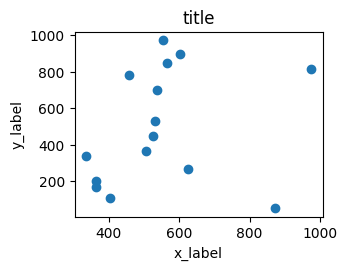

In [271]:
# Create the scatter plot
fig, ax = plt.subplots(figsize=(3.2,2.4), dpi=100)
ax.scatter(x=X, y=y)
ax.set_xlabel('x_label')
ax.set_ylabel('y_label')
ax.set_title('title')


## 2. Deriving dot positions

In [272]:
# Derive the dot pixels
xy_pixels = ax.transData.transform(np.vstack([X,y]).T)
xpix, ypix = xy_pixels.T

# Flip y pixels vertically
fig_width, fig_height = fig.canvas.get_width_height()
ypix_flipped = fig_height - ypix

# Standardise pixels to (0,1)
xpix_std = xpix / fig_width
ypix_std = ypix_flipped / fig_height


In [273]:
# Create summary table for illustrative purposes
summary = pd.DataFrame()
summary['X_values_plotted'] = X
summary['y_values_plotted'] = y
summary['X_coordinate_pixels'] = xpix
summary['y_coordinate_pixels'] = ypix
summary['X_coordinate_std'] = xpix_std
summary['y_coordinate_std'] = ypix_std

summary


,X_values_plotted,y_values_plotted,X_coordinate_pixels,y_coordinate_pixels,X_coordinate_std,y_coordinate_std
0,458.892966,780.138948,94.927951,167.634986,0.296650,0.301521
1,975.482629,813.462882,276.727273,173.725186,0.864773,0.276145
2,601.351976,896.411079,145.062426,188.884594,0.453320,0.212981
3,526.682691,447.205870,118.784654,106.788958,0.371202,0.555046
4,364.682119,166.872310,61.773071,55.555889,0.193041,0.768517
5,566.544258,845.022837,132.812820,179.493005,0.415040,0.252112
6,531.439536,529.277535,120.458693,121.788173,0.376433,0.492549
7,334.844993,336.649730,51.272727,86.583991,0.160227,0.639233
8,504.567267,366.405027,111.001747,92.021996,0.346880,0.616575
9,537.170842,702.262104,122.475666,153.402406,0.382736,0.360823


Explanation to above:
- X_values_plotted: X values plotted on chart
- y_values_plotted: y values plotted on chart
- X_coordinate_pixels: X coordinate positions of dots on chart in pixels (0 left, 320 right)
- y_coordinate_pixels: y coordinate positions of dots on chart in pixels (0 top, 240 bottom)
- X_coordinate_std: X coordinate positions of dots standardised to chart width (0 left, 1 right)
- y_coordinate_std: y coordinate positions of dots standardised to chart height (0 top, 1 bottom)

## 3. Deriving axis tick positions

In [274]:
# Get x and y tick positions in data coordinates
x_ticks_data = ax.get_xticks()
y_ticks_data = ax.get_yticks()

print(x_ticks_data)
print(y_ticks_data)


[ 200.  400.  600.  800. 1000. 1200.]
[   0.  200.  400.  600.  800. 1000. 1200.]


In [275]:
type(x_ticks_data)


numpy.ndarray

In [276]:
# Get minimum axis values
x_lim_min, x_lim_max = ax.get_xlim()
y_lim_min, y_lim_max = ax.get_ylim()

print(x_lim_min)
print(y_lim_min)


302.81311153465157
7.339136461207133


In [277]:
# Removing first and last items tick items that are not visualised

if x_ticks_data.min() != x_lim_min:
    x_ticks_data = np.delete(x_ticks_data, np.where(x_ticks_data == x_ticks_data.min()))
    # x_ticks_data.remove(x_ticks_data[0])

if x_ticks_data.max() != x_lim_max:
    x_ticks_data = np.delete(x_ticks_data, np.where(x_ticks_data == x_ticks_data.max()))

if y_ticks_data.min() != y_lim_min:
    y_ticks_data = np.delete(y_ticks_data, np.where(y_ticks_data == y_ticks_data.min()))

if y_ticks_data.max() != y_lim_max:
    y_ticks_data = np.delete(y_ticks_data, np.where(y_ticks_data == y_ticks_data.max()))

print(x_ticks_data)
print(y_ticks_data)


[ 400.  600.  800. 1000.]
[ 200.  400.  600.  800. 1000.]


In [278]:
# Convert data coordinates to pixel coordinates
x_ticks_pixel = ax.transData.transform([[x, y_lim_min] for x in x_ticks_data])
y_ticks_pixel = ax.transData.transform([[x_lim_min, y] for y in y_ticks_data])

print(x_ticks_pixel)
print('\n')
print(y_ticks_pixel)


[[ 74.2022144   26.4       ]
 [144.58663547  26.4       ]
 [214.97105654  26.4       ]
 [285.35547762  26.4       ]]


[[ 40.          61.61022386]
 [ 40.          98.16173018]
 [ 40.         134.71323651]
 [ 40.         171.26474283]
 [ 40.         207.81624916]]


In [279]:
# Split pixel coordinats into separate lists
x_ticks_x_coord_pixel = x_ticks_pixel[:, 0]
x_ticks_y_coord_pixel = x_ticks_pixel[:, 1]

y_ticks_x_coord_pixel = y_ticks_pixel[:, 0]
y_ticks_y_coord_pixel = y_ticks_pixel[:, 1]

# Flip y coordinates verically
x_ticks_y_coord_pixel_flip = fig_height - x_ticks_y_coord_pixel
y_ticks_y_coord_pixel_flip = fig_height - y_ticks_y_coord_pixel


In [280]:
# Create summary table for illustrative purposes
summary_x_ticks_pixel = pd.DataFrame()
summary_x_ticks_pixel['x_ticks'] = x_ticks_data
summary_x_ticks_pixel['x_ticks_x_coord_pixel'] = x_ticks_x_coord_pixel
summary_x_ticks_pixel['x_ticks_y_coord_pixel_flip'] = x_ticks_y_coord_pixel_flip

summary_y_ticks_pixel = pd.DataFrame()
summary_y_ticks_pixel['y_ticks'] = y_ticks_data
summary_y_ticks_pixel['y_ticks_x_coord_pixel'] = y_ticks_x_coord_pixel
summary_y_ticks_pixel['y_ticks_y_coord_pixel_flip'] = y_ticks_y_coord_pixel_flip

display(summary_x_ticks_pixel)
display(summary_y_ticks_pixel)


,x_ticks,x_ticks_x_coord_pixel,x_ticks_y_coord_pixel_flip
0,400.0,74.202214,213.6
1,600.0,144.586635,213.6
2,800.0,214.971057,213.6
3,1000.0,285.355478,213.6


,y_ticks,y_ticks_x_coord_pixel,y_ticks_y_coord_pixel_flip
0,200.0,40.0,178.389776
1,400.0,40.0,141.838270
2,600.0,40.0,105.286763
3,800.0,40.0,68.735257
4,1000.0,40.0,32.183751


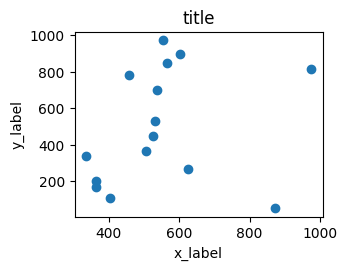

In [281]:
fig


In [282]:
# Standardise pixel coordinates to (0,1)
x_ticks_x_coord_std = x_ticks_x_coord_pixel / fig_width
x_ticks_y_coord_std = x_ticks_y_coord_pixel_flip / fig_height

y_ticks_x_coord_std = y_ticks_x_coord_pixel / fig_width
y_ticks_y_coord_std = y_ticks_y_coord_pixel_flip / fig_height


In [283]:
# Create summary table for illustrative purposes
summary_x_ticks_std = pd.DataFrame()
summary_x_ticks_std['x_ticks'] = x_ticks_data
summary_x_ticks_std['x_ticks_x_coord_std'] = x_ticks_x_coord_std
summary_x_ticks_std['x_ticks_y_coord_std'] = x_ticks_y_coord_std

summary_y_ticks_std = pd.DataFrame()
summary_y_ticks_std['y_ticks'] = y_ticks_data
summary_y_ticks_std['y_ticks_x_coord_std'] = y_ticks_x_coord_std
summary_y_ticks_std['y_ticks_y_coord_std'] = y_ticks_y_coord_std

display(summary_x_ticks_std)
display(summary_y_ticks_std)


,x_ticks,x_ticks_x_coord_std,x_ticks_y_coord_std
0,400.0,0.231882,0.89
1,600.0,0.451833,0.89
2,800.0,0.671785,0.89
3,1000.0,0.891736,0.89


,y_ticks,y_ticks_x_coord_std,y_ticks_y_coord_std
0,200.0,0.125,0.743291
1,400.0,0.125,0.590993
2,600.0,0.125,0.438695
3,800.0,0.125,0.286397
4,1000.0,0.125,0.134099


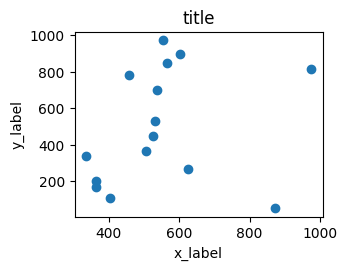

In [284]:
fig
